## Import all libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #for data splitting
from sklearn import tree
import graphviz
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
import matplotlib.pyplot as plt

## Get heart disease data from UI website and convert it into training and testing set

In [4]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url,sep= ',', header = None)
columns_name = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_bld_sugar', 'rest_ecg', 'max_hrtrte_ach'
              ,'exer_indc_angina', 'st_depression', 'st_slope','no_mjr_vssels', 'thalassemia', 'target']
df.columns=columns_name
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df = df.replace({'?':np.NaN})
df.dropna(inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10) #split the data
feature_names = [i for i in X_train.columns]
print(columns_name)
columns_name.remove('target')
X=df[columns_name]

['age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol', 'fasting_bld_sugar', 'rest_ecg', 'max_hrtrte_ach', 'exer_indc_angina', 'st_depression', 'st_slope', 'no_mjr_vssels', 'thalassemia', 'target']


## Implementing Decision Tree Algorithm

In [9]:
model = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_split=5).fit(X_train, y_train)

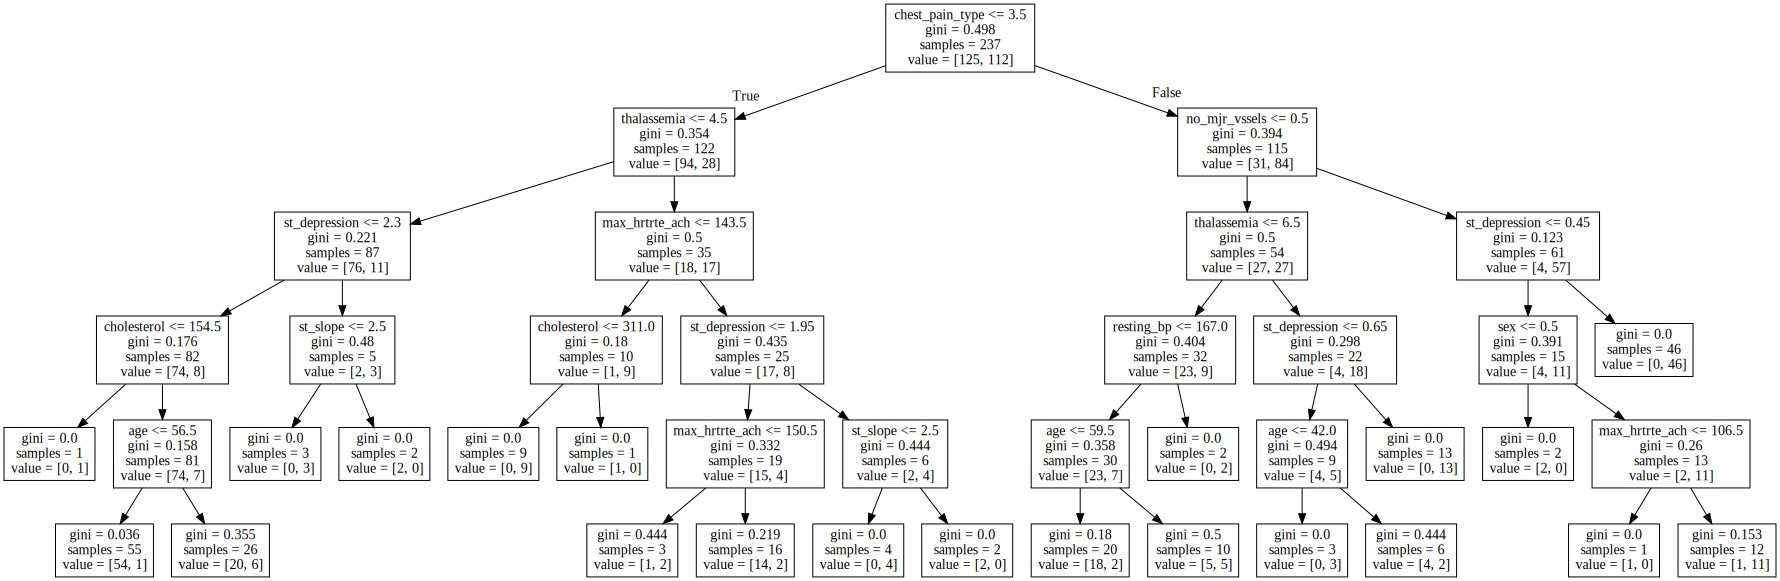

In [10]:
tree_graph = tree.export_graphviz(model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)

## Predict test data set output and measure accuracy of model

In [11]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [14]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[29,  6],
       [ 4, 21]], dtype=int64)

In [15]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8787878787878788
Specificity :  0.7777777777777778


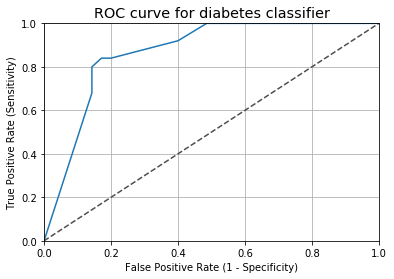

In [20]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [21]:
auc(fpr, tpr)

0.8685714285714284